<center>

# Program No. 6
</center>

### <strong> Objective: </strong>Write a program to demonstrate the working of the decision tree based ID3 Algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder


In [2]:
# Play Tennis Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print(df)


     Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


In [3]:
# Encode categorical features into numbers
le = LabelEncoder()
encoded_df = df.apply(le.fit_transform)
print("\nEncoded Data:\n", encoded_df)



Encoded Data:
     Outlook  Temperature  Humidity  Wind  PlayTennis
0         2            1         0     1           0
1         2            1         0     0           0
2         0            1         0     1           1
3         1            2         0     1           1
4         1            0         1     1           1
5         1            0         1     0           0
6         0            0         1     0           1
7         2            2         0     1           0
8         2            0         1     1           1
9         1            2         1     1           1
10        2            2         1     0           1
11        0            2         0     0           1
12        0            1         1     1           1
13        1            2         0     0           0


In [4]:
X = encoded_df.drop('PlayTennis', axis=1)
y = encoded_df['PlayTennis']

# Create and train ID3 decision tree
model = DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

In [5]:
tree_rules = export_text(model, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)



Decision Tree Rules:

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



In [7]:
# Sample: Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong
sample = pd.DataFrame([['Sunny', 'Cool', 'High', 'Strong']],
                      columns=df.columns[:-1])

# Create separate LabelEncoders for each feature
outlook_le = LabelEncoder().fit(df['Outlook'])
temp_le = LabelEncoder().fit(df['Temperature'])
humidity_le = LabelEncoder().fit(df['Humidity'])
wind_le = LabelEncoder().fit(df['Wind'])

# Transform the sample using the appropriate encoders
encoded_sample = pd.DataFrame([[outlook_le.transform([sample['Outlook'][0]])[0],
                                 temp_le.transform([sample['Temperature'][0]])[0],
                                 humidity_le.transform([sample['Humidity'][0]])[0],
                                 wind_le.transform([sample['Wind'][0]])[0]]],
                               columns=X.columns)

prediction = model.predict(encoded_sample)
result = le.inverse_transform(prediction)

print("\nPrediction for sample (Sunny, Cool, High, Strong):", result[0])



Prediction for sample (Sunny, Cool, High, Strong): No


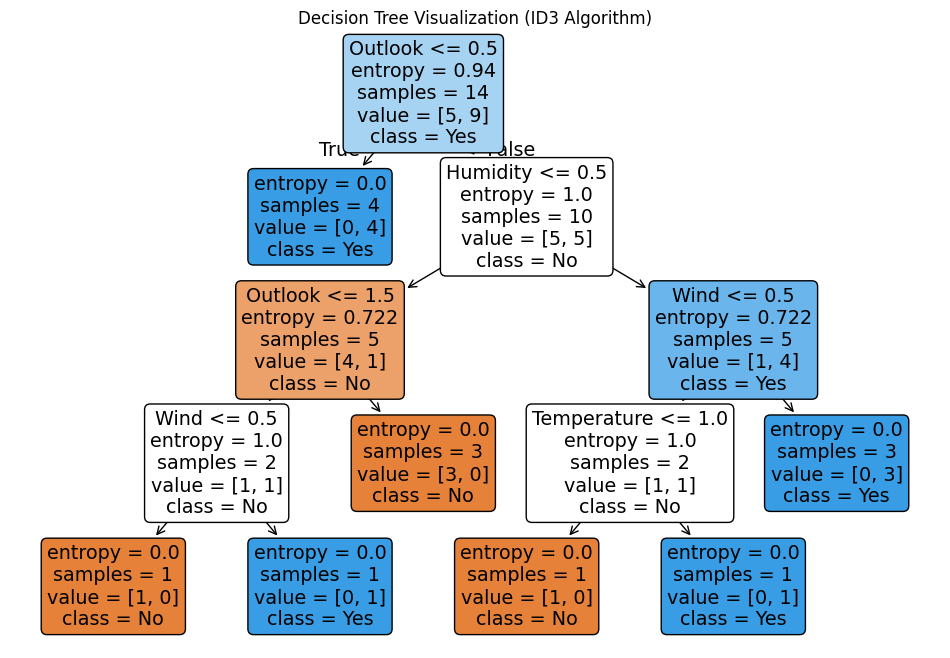

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=X.columns,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization (ID3 Algorithm)")
plt.show()
